# Phase Portrait Applications: Population Dynamics

Teng-Jui Lin

Content adapted from UW AMATH 301, Beginning Scientific Computing, in Spring 2020.

- Phase portraits
    - Population dynamics models
        - Predator-prey model
        - Competition model

## Predator-pray model

Let $x(t)$ be the population of preys (e.g. rabbits) over time, and let $y(t)$ be the population of predators (e.g. foxes) over time. The Lotka-Volterra predator-prey model gives the relationship between the populations over time

$$
\begin{aligned}
\dot{x} &= ax - bxy \\
\dot{y} &= -cy + dxy
\end{aligned}
$$

where $a, b, c, d$ are constants:

- $a$ is the natural growth rate of prey in the absence of predation
- $b$ is the death rate per encounter of prey due to predation
- $c$ is the natural death rate of predator in the absence of prey
- $d$ is the efficiency of turning predated prey into predator (growth rate of predator)

**Problem Statement.** With the initial conditions of $x(0) = 1$ and $y(0) = 1$ (can be later scaled), explore the phase portraits of the system with the following parameters:

- Base case of $(a, b, c, d) = (2, 1, 1, 1)$
- Changing $a$: $a \in [0, 4.5]$ with $\Delta a = 0.5$. Set other parameters as 1.
- Changing $b$: $b \in [0.5, 5]$ with $\Delta b = 0.5$. Set other parameters as 1.
- Changing $c$: $c \in [0, 4.5]$ with $\Delta c = 0.5$. Set other parameters as 1.
- Changing $d$: $d \in [0, 4.5]$ with $\Delta d = 0.5$. Set other parameters as 1.

in $t \in [0, 24] \ \mathrm{months}$.

### Base case

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import integrate

In [2]:
# model params
a = 2
b = 1
c = 1
d = 1

In [3]:
# initial conditions
x0 = 1
y0 = 1
initial_val = np.array([x0, y0])

In [4]:
# time array
t_initial = 0
t_final = 12*2
t = np.linspace(t_initial, t_final, 1000)

In [5]:
# ode system
dxdt = lambda x, y : a*x - b*x*y
dydt = lambda x, y : -c*y + d*x*y
ode_syst = lambda t, z : np.array([dxdt(*z), dydt(*z)])

In [6]:
# ode soln
ode_soln = scipy.integrate.solve_ivp(ode_syst, [t_initial, t_final], initial_val, t_eval=t)

In [7]:
# quiver grid
xvec = np.linspace(0, 15, 20)
yvec = np.linspace(0, 15, 20)
X, Y = np.meshgrid(xvec, yvec)

In [8]:
# plot settings
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.rcParams.update({
    'font.family': 'Arial',  # Times New Roman, Calibri
    'font.weight': 'normal',
    'mathtext.fontset': 'cm',
    'font.size': 18,
    
    'lines.linewidth': 2,
    
    'axes.linewidth': 2,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.titleweight': 'bold',
    'axes.titlesize': 18,
    'axes.labelweight': 'bold',
    
    'xtick.major.size': 8,
    'xtick.major.width': 2,
    'ytick.major.size': 8,
    'ytick.major.width': 2,
    
    'figure.dpi': 80,
    
    'legend.framealpha': 1, 
    'legend.edgecolor': 'black',
    'legend.fancybox': False,
    'legend.fontsize': 14
})

C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


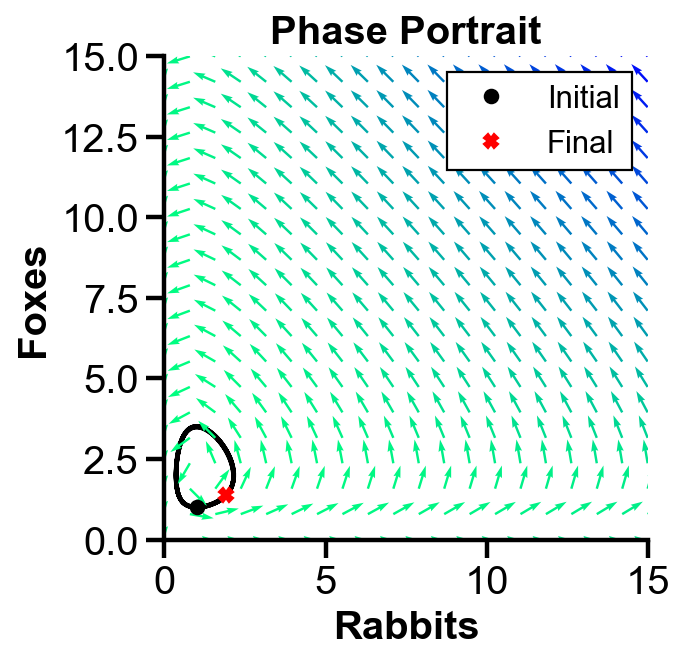

In [9]:
fig, ax = plt.subplots(figsize=(4, 4))
# phase portrait
scale = np.sqrt(dxdt(X, Y)**2 + dydt(X, Y)**2)
ax.quiver(X, Y, dxdt(X, Y)/scale, dydt(X, Y)/scale, scale, cmap='winter_r', scale=20, width=0.005)  # regular
ax.plot(*initial_val, 'o', color='black', label='Initial')
ax.plot(ode_soln.y[0], ode_soln.y[1], color='black', zorder=0.5)
ax.plot(ode_soln.y[0, -1], ode_soln.y[1, -1], 'X', color='red', zorder=4, label='Final')
# plot settings
ax.set_xlim(0, 15)
ax.set_ylim(0, 15)
ax.set_xlabel('Rabbits')
ax.set_ylabel('Foxes')
ax.set_title(f'Phase Portrait')
ax.set_aspect('equal')
ax.legend(loc='upper right')

▲ The figure above shows the phase portrait of the rabbit-fox model with parameters $(a, b, c, d) = (2, 1, 1, 1)$. The trajectory forms a closed loop, indicating that the population of rabbits and foxes oscillates over time. Neither species extincts.

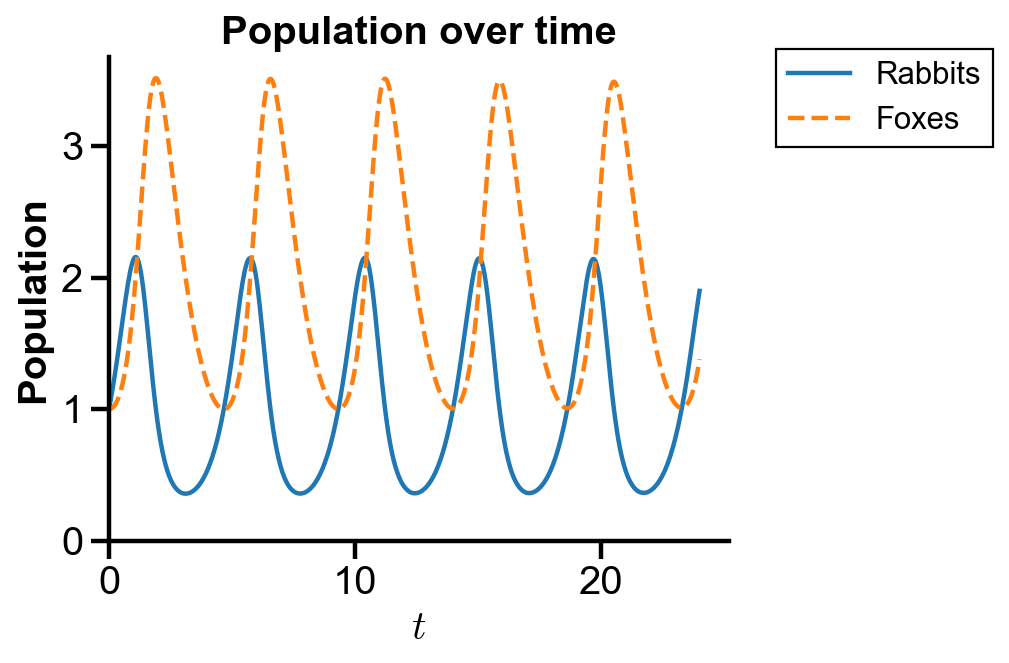

In [10]:
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(t, ode_soln.y[0], label='Rabbits')
ax.plot(t, ode_soln.y[1], '--', label='Foxes')
# plot settings
ax.set_xlim(0)
ax.set_ylim(0)
ax.set_xlabel('$t$')
ax.set_ylabel('Population')
ax.set_title(f'Population over time')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.05))

▲ The figure above shows the population of rabbits and foxes with parameters $(a, b, c, d) = (2, 1, 1, 1)$. The population of each species oscillates over time. When one population is at maximum, the other soon achieves minimum as a result of predation.

### Changing $a$

In [11]:
# model params
a = np.arange(0, 5, 0.5)
b = 1
c = 1
d = 1

In [12]:
# initial conditions
x0 = 1
y0 = 1
initial_val = np.array([x0, y0])

In [13]:
# time array
t_initial = 0
t_final = 12*2
t = np.linspace(t_initial, t_final, 1000)

In [14]:
# quiver grid
xvec = np.linspace(0, 15, 15)
yvec = np.linspace(0, 15, 15)
X, Y = np.meshgrid(xvec, yvec)

In [15]:
row = 2
col = 5
fig1, axs1 = plt.subplots(row, col, figsize=(col*3, row*3), sharex=True, sharey=True)
fig1.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)  # hide tick and tick label of the big axis
plt.xlabel('Rabbits')
plt.ylabel('Foxes')
plt.title('Phase Portrait', y=1.1)

fig2, axs2 = plt.subplots(row, col, figsize=(col*3, row*3-1), sharex=True, sharey=True)
fig2.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)  # hide tick and tick label of the big axis
plt.xlabel('$t$')
plt.ylabel('Population')
plt.title('Population over time', y=1.1)

for row_i in range(row):
    for col_i in range(col):
        i = row_i*col + col_i
        # ode system
        dxdt = lambda x, y : a[i]*x - b*x*y
        dydt = lambda x, y : -c*y + d*x*y
        ode_syst = lambda t, z : np.array([dxdt(*z), dydt(*z)])
        # ode soln
        ode_soln = scipy.integrate.solve_ivp(ode_syst, [t_initial, t_final], initial_val, t_eval=t)
        # phase portrait
        scale = np.sqrt(dxdt(X, Y)**2 + dydt(X, Y)**2)
        axs1[row_i, col_i].quiver(X, Y, dxdt(X, Y)/scale, dydt(X, Y)/scale, scale, cmap='winter_r', scale=15, width=0.008)  # regular
        axs1[row_i, col_i].plot(*initial_val, 'o', color='black', label='Initial')
        axs1[row_i, col_i].plot(ode_soln.y[0], ode_soln.y[1], color='black', zorder=0.5)
        axs1[row_i, col_i].plot(ode_soln.y[0, -1], ode_soln.y[1, -1], 'X', color='red', zorder=4, label='Final')
        # plot settings
        axs1[row_i, col_i].set_xlim(0, 15)
        axs1[row_i, col_i].set_ylim(0, 15)
        axs1[row_i, col_i].set_title(f'a = {a[i] :.1f}')
        axs1[row_i, col_i].set_aspect('equal')
        axs2[row_i, col_i].plot(t, ode_soln.y[0], label='Rabbits')
        axs2[row_i, col_i].plot(t, ode_soln.y[1], label='Foxes')
        axs2[row_i, col_i].set_xlim(t_initial, t_final)
        axs2[row_i, col_i].set_ylim(0, 15)
        axs2[row_i, col_i].set_title(f'a = {a[i] :.1f}')
        # compromised legend for common xylabels
        if row_i == 0 and col_i == (col-1):
            axs1[row_i, col_i].legend()
            axs2[row_i, col_i].legend()

C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: R

▲ The figure above shows the phase portrait of the rabbit-fox system and their population over time with changing $a$, the natural growth rate of prey in the absence of predation.

For $a=0$, the rabbit does not reproduce and its population dies off due to predation. As a result, the lack of rabbits also leads to the dieing of foxes. Both species extincts at the end.

For $a=1$, with other parameters, the ODE simplifies to

$$
\begin{aligned}
\dot{x} &= x - xy \\
\dot{y} &= -y + xy
\end{aligned}
$$

With the initial condition of $x(0) = 1, y(0) = 1$, the derivatives are $\dot{x} = 0, \dot{y} = 0$, so the population stays constant over time, as shown in the dot of the phase portrait and the constant curve of population over time.

For larger $a$, as $a$ increases, the growth rate of rabbit increases, so the maximum population of rabbit increases. As a result, the population of fox also increases. The loop of the phase diagram becomes larger with increasing maximum of rabbit and fox population. The population of rabbit and fox over time also have higher maximums.

### Changing $b$

In [16]:
# model params
a = 1
b = np.arange(0.5, 5.5, 0.5)
c = 1
d = 1

In [17]:
# initial conditions
x0 = 1
y0 = 1
initial_val = np.array([x0, y0])

In [18]:
# time array
t_initial = 0
t_final = 12*2
t = np.linspace(t_initial, t_final, 1000)

In [19]:
# quiver grid
xvec = np.linspace(0, 15, 15)
yvec = np.linspace(0, 15, 15)
X, Y = np.meshgrid(xvec, yvec)

C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: R

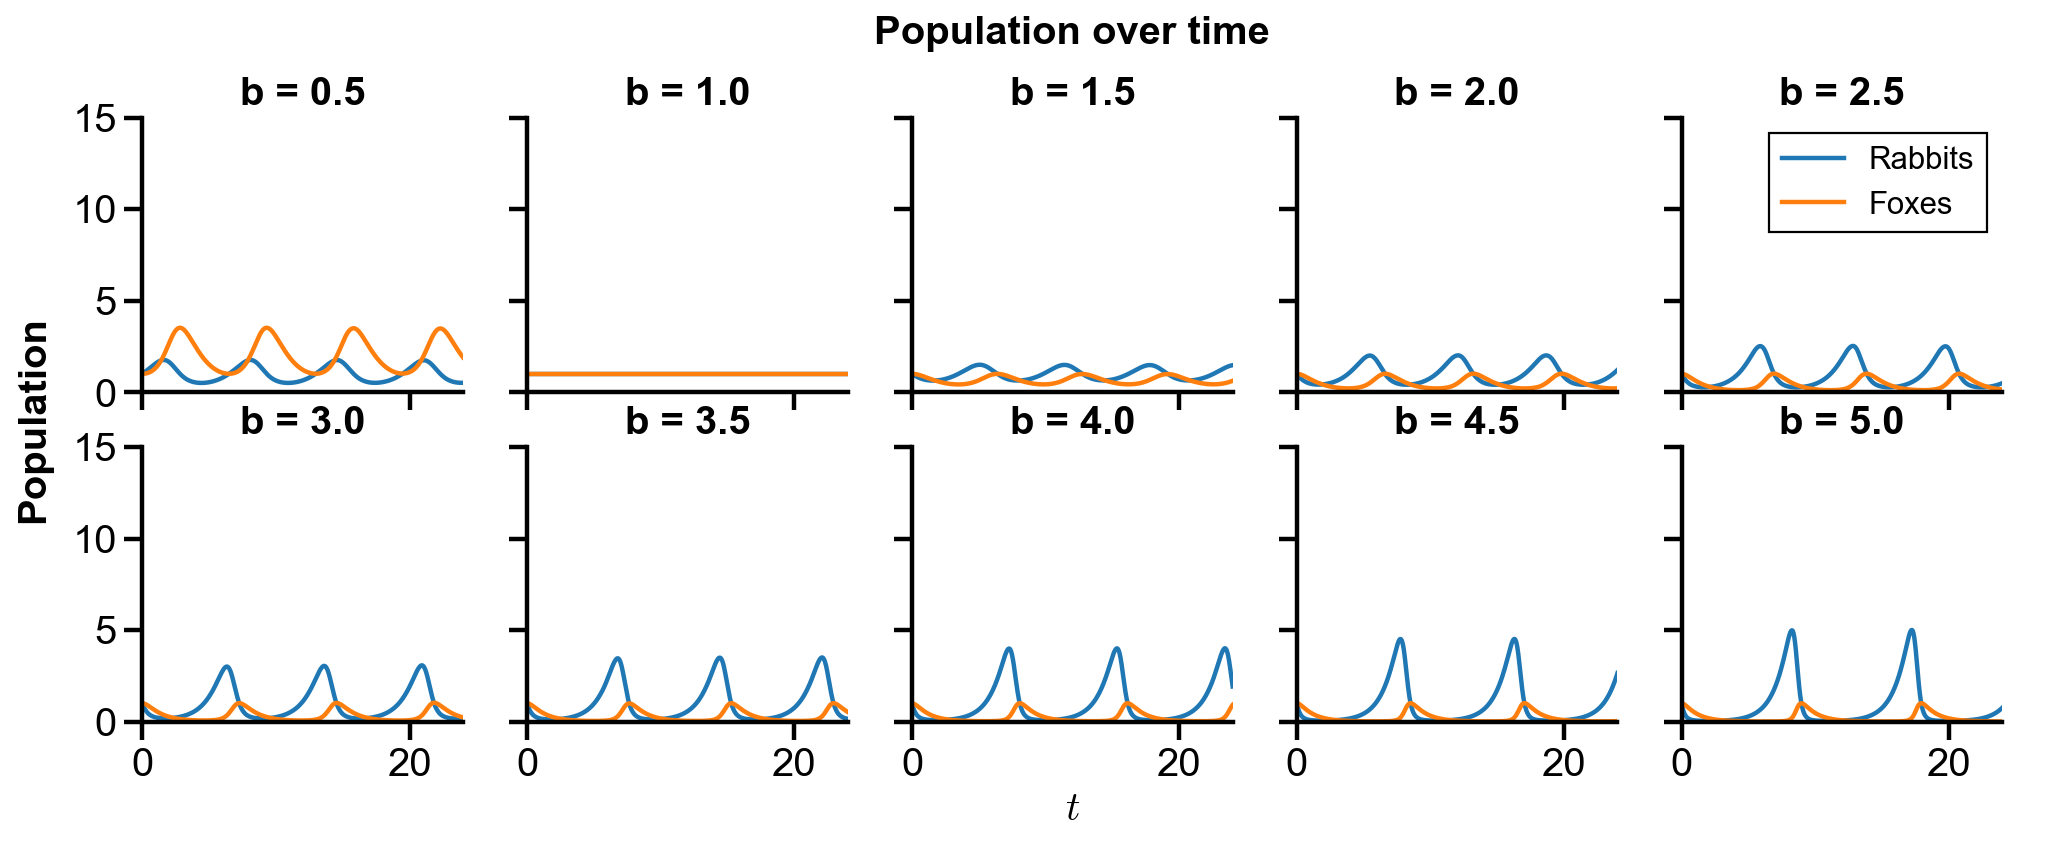

In [20]:
row = 2
col = 5
fig1, axs1 = plt.subplots(row, col, figsize=(col*3, row*3), sharex=True, sharey=True)
fig1.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)  # hide tick and tick label of the big axis
plt.xlabel('Rabbits')
plt.ylabel('Foxes')
plt.title('Phase Portrait', y=1.1)

fig2, axs2 = plt.subplots(row, col, figsize=(col*3, row*3-1), sharex=True, sharey=True)
fig2.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)  # hide tick and tick label of the big axis
plt.xlabel('$t$')
plt.ylabel('Population')
plt.title('Population over time', y=1.1)

for row_i in range(row):
    for col_i in range(col):
        i = row_i*col + col_i
        # ode system
        dxdt = lambda x, y : a*x - b[i]*x*y
        dydt = lambda x, y : -c*y + d*x*y
        ode_syst = lambda t, z : np.array([dxdt(*z), dydt(*z)])
        # ode soln
        ode_soln = scipy.integrate.solve_ivp(ode_syst, [t_initial, t_final], initial_val, t_eval=t)
        # phase portrait
        scale = np.sqrt(dxdt(X, Y)**2 + dydt(X, Y)**2)
        axs1[row_i, col_i].quiver(X, Y, dxdt(X, Y)/scale, dydt(X, Y)/scale, scale, cmap='winter_r', scale=15, width=0.008)  # regular
        axs1[row_i, col_i].plot(*initial_val, 'o', color='black', label='Initial')
        axs1[row_i, col_i].plot(ode_soln.y[0], ode_soln.y[1], color='black', zorder=0.5)
        axs1[row_i, col_i].plot(ode_soln.y[0, -1], ode_soln.y[1, -1], 'X', color='red', zorder=4, label='Final')        
        # plot settings
        axs1[row_i, col_i].set_xlim(0, 15)
        axs1[row_i, col_i].set_ylim(0, 15)
        axs1[row_i, col_i].set_title(f'b = {b[i] :.1f}')
        axs1[row_i, col_i].set_aspect('equal')
        axs2[row_i, col_i].plot(t, ode_soln.y[0], label='Rabbits')
        axs2[row_i, col_i].plot(t, ode_soln.y[1], label='Foxes')
        axs2[row_i, col_i].set_xlim(t_initial, t_final)
        axs2[row_i, col_i].set_ylim(0, 15)
        axs2[row_i, col_i].set_title(f'b = {b[i] :.1f}')
        # compromised legend for common xylabels
        if row_i == 0 and col_i == (col-1):
            axs1[row_i, col_i].legend()
            axs2[row_i, col_i].legend()

▲ The figure above shows the phase portrait of the rabbit-fox system and their population over time with changing $b$, the death rate per encounter of prey due to predation.

For $b=1$, the same argument above applies to explain the constant population.

For $b<1$, the maximum fox population is greater than that of rabbit.

For $b>1$, the maximum rabbit population is greater than that of fox. As $b$ increases, the maximum of rabbit population increases, and the drop from the maximum is faster.

### Changing $c$

In [21]:
# model params
a = 1
b = 1
c = np.arange(0, 5, 0.5)
d = 1

In [22]:
# initial conditions
x0 = 1
y0 = 1
initial_val = np.array([x0, y0])

In [23]:
# time array
t_initial = 0
t_final = 12*2
t = np.linspace(t_initial, t_final, 1000)

In [24]:
# quiver grid
xvec = np.linspace(0, 15, 15)
yvec = np.linspace(0, 15, 15)
X, Y = np.meshgrid(xvec, yvec)

C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: R

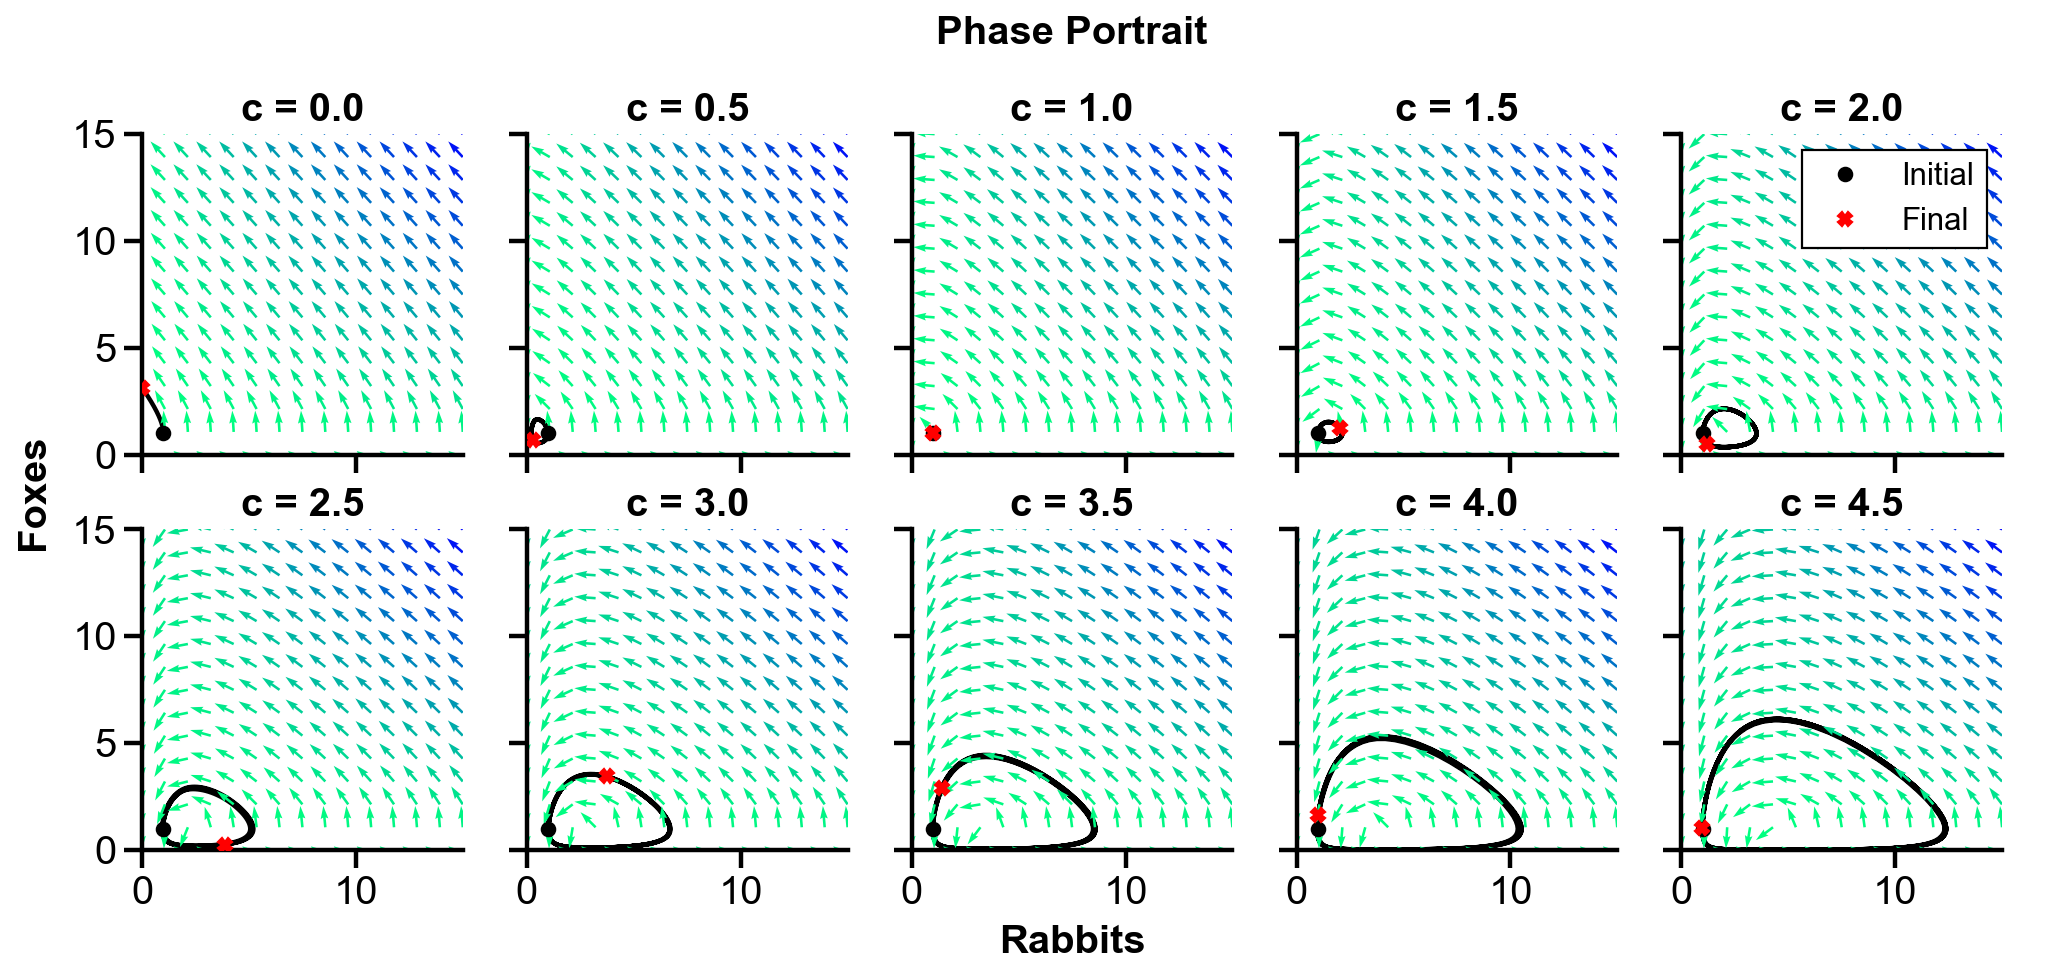

In [25]:
row = 2
col = 5
fig1, axs1 = plt.subplots(row, col, figsize=(col*3, row*3), sharex=True, sharey=True)
fig1.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)  # hide tick and tick label of the big axis
plt.xlabel('Rabbits')
plt.ylabel('Foxes')
plt.title('Phase Portrait', y=1.1)

fig2, axs2 = plt.subplots(row, col, figsize=(col*3, row*3-1), sharex=True, sharey=True)
fig2.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)  # hide tick and tick label of the big axis
plt.xlabel('$t$')
plt.ylabel('Population')
plt.title('Population over time', y=1.1)

for row_i in range(row):
    for col_i in range(col):
        i = row_i*col + col_i
        # ode system
        dxdt = lambda x, y : a*x - b*x*y
        dydt = lambda x, y : -c[i]*y + d*x*y
        ode_syst = lambda t, z : np.array([dxdt(*z), dydt(*z)])
        # ode soln
        ode_soln = scipy.integrate.solve_ivp(ode_syst, [t_initial, t_final], initial_val, t_eval=t)
        # phase portrait
        scale = np.sqrt(dxdt(X, Y)**2 + dydt(X, Y)**2)
        axs1[row_i, col_i].quiver(X, Y, dxdt(X, Y)/scale, dydt(X, Y)/scale, scale, cmap='winter_r', scale=15, width=0.008)  # regular
        axs1[row_i, col_i].plot(*initial_val, 'o', color='black', label='Initial')
        axs1[row_i, col_i].plot(ode_soln.y[0], ode_soln.y[1], color='black', zorder=0.5)
        axs1[row_i, col_i].plot(ode_soln.y[0, -1], ode_soln.y[1, -1], 'X', color='red', zorder=4, label='Final')
        # plot settings
        axs1[row_i, col_i].set_xlim(0, 15)
        axs1[row_i, col_i].set_ylim(0, 15)
        axs1[row_i, col_i].set_title(f'c = {c[i] :.1f}')
        axs1[row_i, col_i].set_aspect('equal')
        axs2[row_i, col_i].plot(t, ode_soln.y[0], label='Rabbits')
        axs2[row_i, col_i].plot(t, ode_soln.y[1], label='Foxes')
        axs2[row_i, col_i].set_xlim(t_initial, t_final)
        axs2[row_i, col_i].set_ylim(0, 15)
        axs2[row_i, col_i].set_title(f'c = {c[i] :.1f}')
        # compromised legend for common xylabels
        if row_i == 0 and col_i == (col-1):
            axs1[row_i, col_i].legend()
            axs2[row_i, col_i].legend()

▲ The figure above shows the phase portrait of the rabbit-fox system and their population over time with changing $c$, the natural death rate of predator in the absence of prey.

For $c=0$, the foxes wouldn't die even without rabbits, so the fox population stays constant after the rabbit extincts.

For $c=1$, the same argument above applies to explain the constant population.

For $0<c<1$, the maximum fox population is greater than that of rabbit.

For $c>1$, the maximum rabbit population is greater than that of fox. As $c$ increases, the maximum of rabbit and fox populations increase, and the drop from their maximum is faster.

### Changing $d$

In [26]:
# model params
a = 1
b = 1
c = 1
d = np.arange(0, 5, 0.5)

In [27]:
# initial conditions
x0 = 1
y0 = 1
initial_val = np.array([x0, y0])

In [28]:
# time array
t_initial = 0
t_final = 12*2
t = np.linspace(t_initial, t_final, 1000)

In [29]:
# quiver grid
xvec = np.linspace(0, 15, 15)
yvec = np.linspace(0, 15, 15)
X, Y = np.meshgrid(xvec, yvec)

In [30]:
row = 2
col = 5
fig1, axs1 = plt.subplots(row, col, figsize=(col*3, row*3), sharex=True, sharey=True)
fig1.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)  # hide tick and tick label of the big axis
plt.xlabel('Rabbits')
plt.ylabel('Foxes')
plt.title('Phase Portrait', y=1.1)

fig2, axs2 = plt.subplots(row, col, figsize=(col*3, row*3-1), sharex=True, sharey=True)
fig2.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)  # hide tick and tick label of the big axis
plt.xlabel('$t$')
plt.ylabel('Population')
plt.title('Population over time', y=1.1)

for row_i in range(row):
    for col_i in range(col):
        i = row_i*col + col_i
        # ode system
        dxdt = lambda x, y : a*x - b*x*y
        dydt = lambda x, y : -c*y + d[i]*x*y
        ode_syst = lambda t, z : np.array([dxdt(*z), dydt(*z)])
        # ode soln
        ode_soln = scipy.integrate.solve_ivp(ode_syst, [t_initial, t_final], initial_val, t_eval=t)
        # phase portrait
        scale = np.sqrt(dxdt(X, Y)**2 + dydt(X, Y)**2)
        axs1[row_i, col_i].quiver(X, Y, dxdt(X, Y)/scale, dydt(X, Y)/scale, scale, cmap='winter_r', scale=15, width=0.008)  # regular
        axs1[row_i, col_i].plot(*initial_val, 'o', color='black', label='Initial')
        axs1[row_i, col_i].plot(ode_soln.y[0], ode_soln.y[1], color='black', zorder=0.5)
        axs1[row_i, col_i].plot(ode_soln.y[0, -1], ode_soln.y[1, -1], 'X', color='red', zorder=4, label='Final')
        # plot settings
        axs1[row_i, col_i].set_xlim(0, 15)
        axs1[row_i, col_i].set_ylim(0, 15)
        axs1[row_i, col_i].set_title(f'd = {d[i] :.1f}')
        axs1[row_i, col_i].set_aspect('equal')
        axs2[row_i, col_i].plot(t, ode_soln.y[0], label='Rabbits')
        axs2[row_i, col_i].plot(t, ode_soln.y[1], label='Foxes')
        axs2[row_i, col_i].set_xlim(t_initial, t_final)
        axs2[row_i, col_i].set_ylim(0, 15)
        axs2[row_i, col_i].set_title(f'd = {d[i] :.1f}')
        # compromised legend for common xylabels
        if row_i == 0 and col_i == (col-1):
            axs1[row_i, col_i].legend()
            axs2[row_i, col_i].legend()

C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:28: R

▲ The figure above shows the phase portrait of the rabbit-fox system and their population over time with changing $d$, the efficiency of turning predated prey into predator .

For $d=0$, the foxes wouldn't breed even with rabbits, so the fox extincts. Without foxes, the rabbit goes into exponential growth.

For $d=1$, the same argument above applies to explain the constant population.

For $0<d<1$, the maximum rabbit population is greater than that of fox.

For $d>1$, the maximum fox population is greater than that of rabbit. As $d$ increases, the maximum of fox populations increase, and the increase to the maximum is faster.

## Acknowledgement

I would like to thank Mr. Ben Trey, my high school everything teacher (Algebra II, AP Calculus BC, AP Physics 1, AP Chemistry, Applied Linear Algebra and Differential Equations), for introducing the concept of differential equation to me when I was in tenth grade (June 2017). We solved the Lotka-Volterra predator prey model with various parameters using the forward Euler method.

Here, we reproduce a subset of the result that was produced at that time.

**Problem Statement.** With the initial conditions of $x(0) = 10, y(0) = 10$, explore the phase portrait and population over time with the following parameters:

- Changing $d$: $d \in [0.5, 5]$ with $\Delta d = 0.5$
- Fixed other parameters $(a, b, c) = (10, 1, 1)$

in $t \in [0, 24] \ \mathrm{months}$.

In [31]:
# model params
a = 10
b = 1
c = 1
d = np.arange(0.5, 5.1, 0.5)

In [32]:
# initial conditions
x0 = 10
y0 = 10
initial_val = np.array([x0, y0])

In [33]:
# time array
t_initial = 0
t_final = 12*2
t = np.linspace(t_initial, t_final, 1000)

In [34]:
# quiver grid
xvec = np.linspace(0, 15, 15)
yvec = np.linspace(0, 45, 15)
X, Y = np.meshgrid(xvec, yvec)

C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:30: R

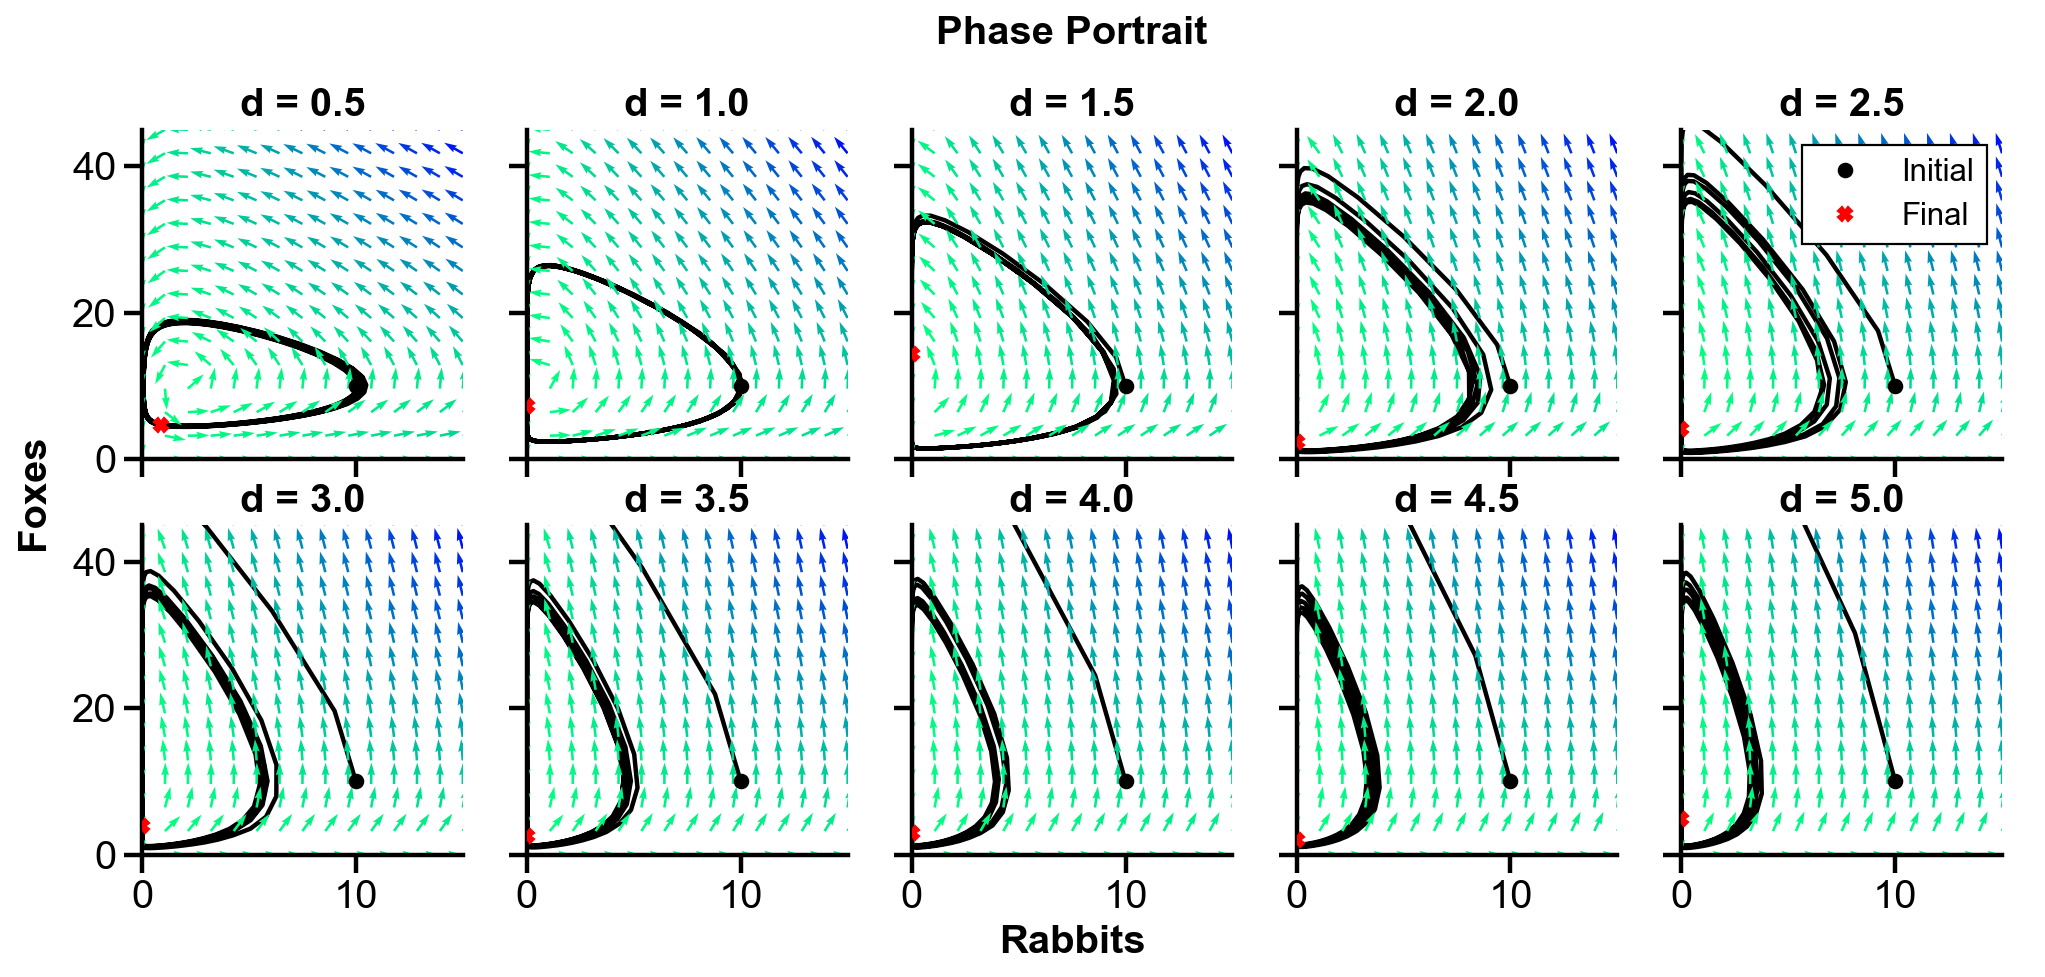

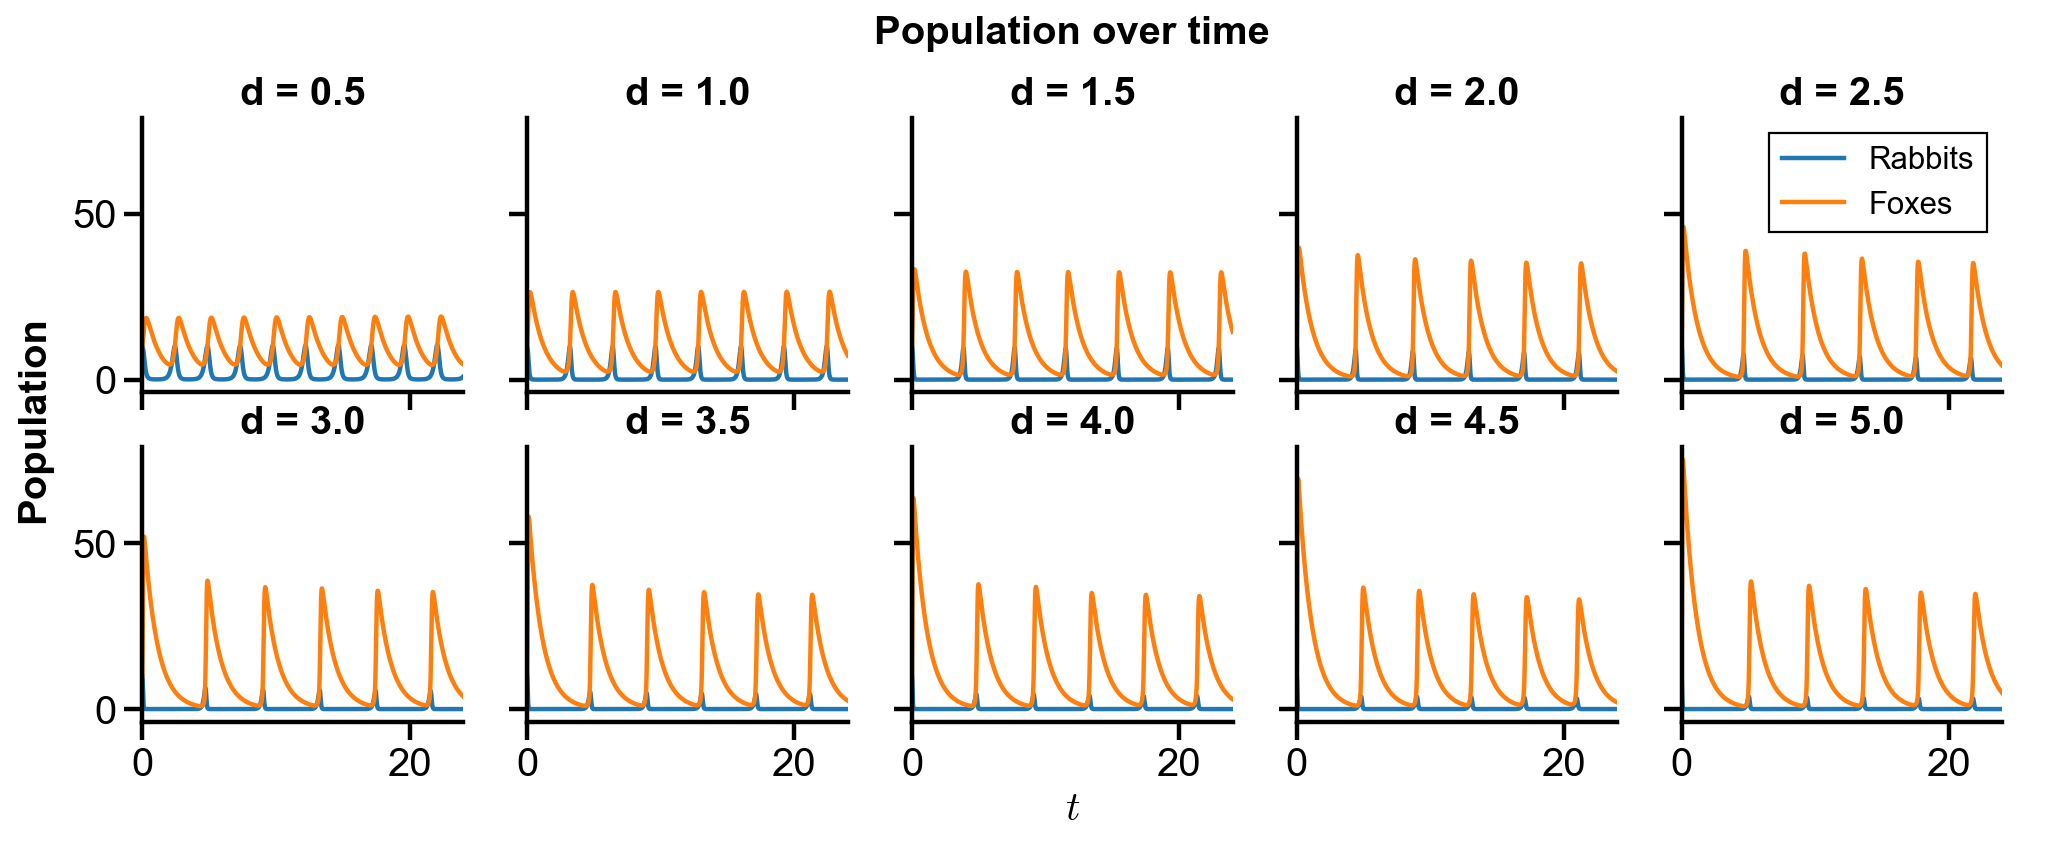

In [35]:
row = 2
col = 5
fig1, axs1 = plt.subplots(row, col, figsize=(col*3, row*3), sharex=True, sharey=True)
# share x and y labels
fig1.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)  # hide tick and tick label of the big axis
plt.xlabel('Rabbits')
plt.ylabel('Foxes')
plt.title('Phase Portrait', y=1.1)

fig2, axs2 = plt.subplots(row, col, figsize=(col*3, row*3-1), sharex=True, sharey=True)
# share x and y labels
fig2.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)  # hide tick and tick label of the big axis
plt.xlabel('$t$')
plt.ylabel('Population')
plt.title('Population over time', y=1.1)

for row_i in range(row):
    for col_i in range(col):
        i = row_i*col + col_i
        # ode system
        dxdt = lambda x, y : a*x - b*x*y
        dydt = lambda x, y : -c*y + d[i]*x*y
        ode_syst = lambda t, z : np.array([dxdt(*z), dydt(*z)])
        # ode soln
        ode_soln = scipy.integrate.solve_ivp(ode_syst, [t_initial, t_final], initial_val, t_eval=t)
        # phase portrait
        scale = np.sqrt(dxdt(X, Y)**2 + dydt(X, Y)**2)
        axs1[row_i, col_i].quiver(X, Y, dxdt(X, Y)/scale, dydt(X, Y)/scale, scale, cmap='winter_r', scale=15, width=0.008)  # regular
        axs1[row_i, col_i].plot(*initial_val, 'o', color='black', label='Initial')
        axs1[row_i, col_i].plot(ode_soln.y[0], ode_soln.y[1], color='black', zorder=0.5)
        axs1[row_i, col_i].plot(ode_soln.y[0, -1], ode_soln.y[1, -1], 'X', color='red', zorder=4, label='Final')
        # plot settings
        axs1[row_i, col_i].set_xlim(0, 15)
        axs1[row_i, col_i].set_ylim(0, 45)
        axs1[row_i, col_i].set_title(f'd = {d[i] :.1f}')
        axs2[row_i, col_i].plot(t, ode_soln.y[0], label='Rabbits')
        axs2[row_i, col_i].plot(t, ode_soln.y[1], label='Foxes')
        axs2[row_i, col_i].set_xlim(t_initial, t_final)
        axs2[row_i, col_i].set_title(f'd = {d[i] :.1f}')
        # compromised legend for common xylabels
        if row_i == 0 and col_i == (col-1):
            axs1[row_i, col_i].legend()
            axs2[row_i, col_i].legend()

▲ Perfectly reproduced!

## Competition model

Let $x(t)$ and $y(t)$ be the population of two competing species (e.g. rabbits and sheep). Because they compete for resources, they satisfy the following simplified competitive Lotka–Volterra equations:

$$
\begin{aligned}
\dot{x} &= x(3-x) - 2xy \\
\dot{y} &= y(2-y) - xy
\end{aligned}
$$

**Problem Statement.** Solve the system of ODEs in $t \in [0, 10]$ with the initial conditions

- $x(0) = 1.5, y(0) = 1$
- $x(0) = 1, y(0) = 1.5$

Plot the phase portrait and population over time.

### Rabbit dominance

In [36]:
# initial conditions
x0 = 1.5
y0 = 1
initial_val = np.array([x0, y0])

In [37]:
# time array
t_initial = 0
t_final = 10
t = np.linspace(t_initial, t_final, 1000)

In [38]:
# ode system
dxdt = lambda x, y : x*(3-x) - 2*x*y
dydt = lambda x, y : y*(2-y) - x*y
ode_syst = lambda t, z : np.array([dxdt(*z), dydt(*z)])

In [39]:
# ode soln
ode_soln = scipy.integrate.solve_ivp(ode_syst, [t_initial, t_final], initial_val, t_eval=t)

In [40]:
# quiver grid
xvec = np.linspace(0, 4, 25)
yvec = np.linspace(0, 4, 25)
X, Y = np.meshgrid(xvec, yvec)

C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


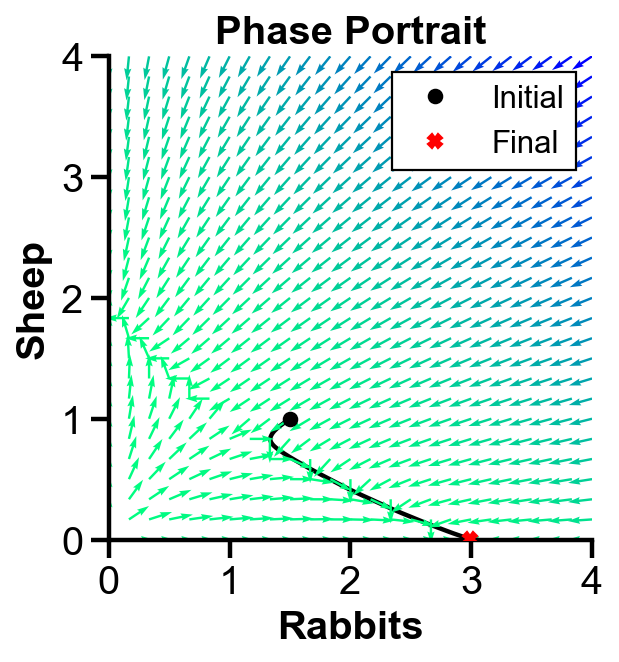

In [41]:
fig, ax = plt.subplots(figsize=(4, 4))
# phase portrait
scale = np.sqrt(dxdt(X, Y)**2 + dydt(X, Y)**2)
ax.quiver(X, Y, dxdt(X, Y)/scale, dydt(X, Y)/scale, scale, cmap='winter_r', scale=20, width=0.005)  # regular
ax.plot(*initial_val, 'o', color='black', label='Initial')
ax.plot(ode_soln.y[0], ode_soln.y[1], color='black', zorder=0.5)
ax.plot(ode_soln.y[0, -1], ode_soln.y[1, -1], 'X', color='red', zorder=4, label='Final')
# plot settings
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
ax.set_xlabel('Rabbits')
ax.set_ylabel('Sheep')
ax.set_title(f'Phase Portrait')
ax.set_aspect('equal')
ax.legend(loc='upper right')

▲ The figure above shows the phase portrait with initial condition where rabbit population dominates sheep population for the system.

The population of both population first decreases. Then, the slope field pushes the rabbit population to increase and the sheep population to decrease. Sheep extincts over time.

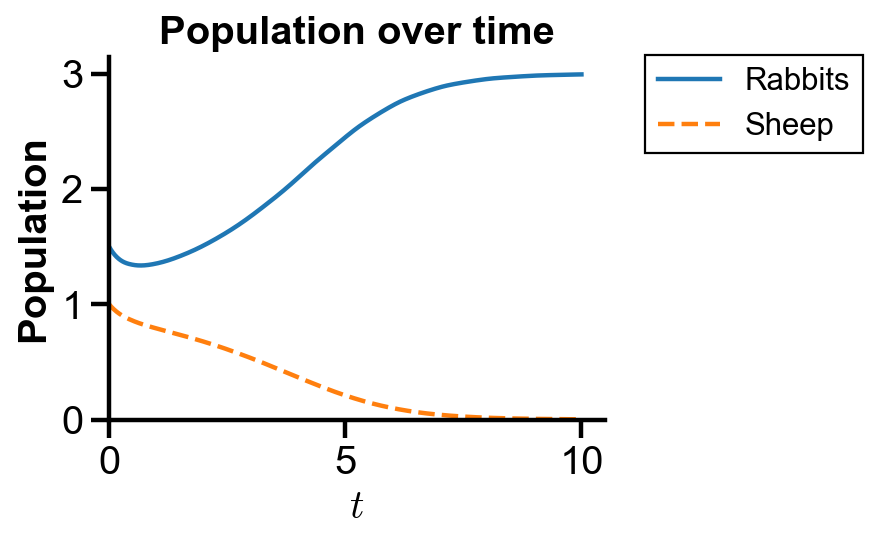

In [42]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(t, ode_soln.y[0], label='Rabbits')
ax.plot(t, ode_soln.y[1], '--', label='Sheep')
# plot settings
ax.set_xlim(0)
ax.set_ylim(0)
ax.set_xlabel('$t$')
ax.set_ylabel('Population')
ax.set_title(f'Population over time')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.05))

▲ The figure above shows the population over time with initial condition where rabbit population dominates sheep population for the system.

The figure confirms the initial decrease of both rabbit and sheep populations and the raise of rabbit population with the extinction of sheep.

### Sheep dominance

In [43]:
# initial conditions
x0 = 1
y0 = 1.5
initial_val = np.array([x0, y0])

In [44]:
# ode soln
ode_soln = scipy.integrate.solve_ivp(ode_syst, [t_initial, t_final], initial_val, t_eval=t)

C:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


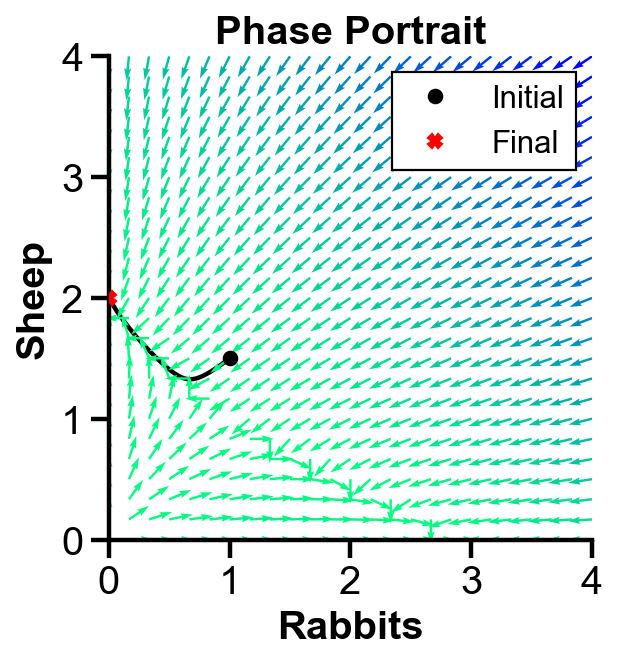

In [45]:
fig, ax = plt.subplots(figsize=(4, 4))
# phase portrait
scale = np.sqrt(dxdt(X, Y)**2 + dydt(X, Y)**2)
ax.quiver(X, Y, dxdt(X, Y)/scale, dydt(X, Y)/scale, scale, cmap='winter_r', scale=20, width=0.005)  # regular
ax.plot(*initial_val, 'o', color='black', label='Initial')
ax.plot(ode_soln.y[0], ode_soln.y[1], color='black', zorder=0.5)
ax.plot(ode_soln.y[0, -1], ode_soln.y[1, -1], 'X', color='red', zorder=4, label='Final')
# plot settings
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)
ax.set_xlabel('Rabbits')
ax.set_ylabel('Sheep')
ax.set_title(f'Phase Portrait')
ax.set_aspect('equal')
ax.legend(loc='upper right')

▲ The figure above shows the phase portrait with initial condition where sheep population dominates rabbit population for the system.

The population of both population first decreases. Then, the slope field pushes the sheep population to increase and the rabbit population to decrease. Rabbit extincts over time.

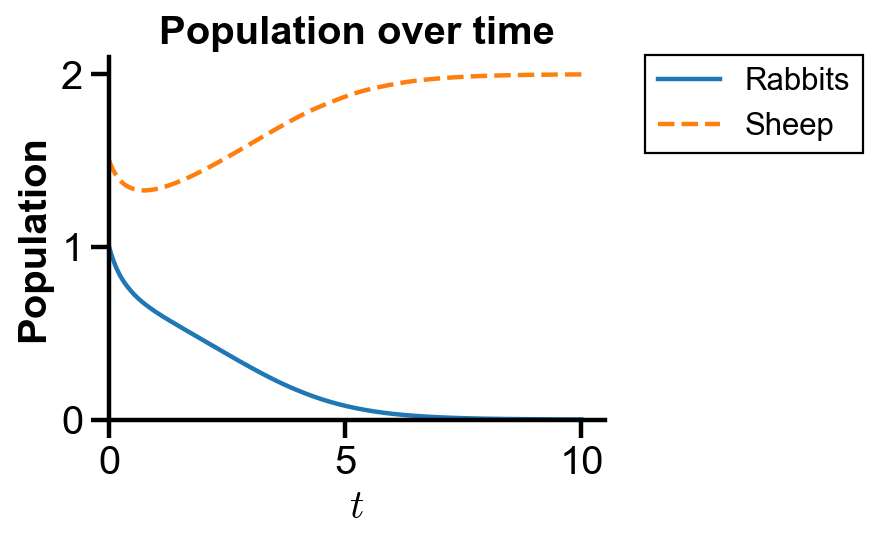

In [46]:
fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(t, ode_soln.y[0], label='Rabbits')
ax.plot(t, ode_soln.y[1], '--', label='Sheep')
# plot settings
ax.set_xlim(0)
ax.set_ylim(0)
ax.set_xlabel('$t$')
ax.set_ylabel('Population')
ax.set_title(f'Population over time')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.05))

▲ The figure above shows the population over time with initial condition where sheep population dominates rabbit population for the system.

The figure confirms the initial decrease of both rabbit and sheep populations and the raise of sheep population with the extinction of rabbit.